In [1]:
import pandas as pd
import seaborn as sns
import os
from os import listdir
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

import numpy as np

import cv2

from sklearn.metrics import classification_report
from keras.models import load_model
import matplotlib.pyplot as plt

from keras.callbacks import CSVLogger
from keras import metrics
from keras import backend as K
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [2]:
datasetAF = pd.read_csv("D:\\Dropbox\\utd\\cs courses\\cs 4375 machine learning\\assignments\\project\\rating csv data\\All_Ratings asian female csv.txt",header = 0)
avgPerFile = datasetAF['Rating'].groupby(datasetAF['Filename'],sort=False)
averagePerFileMean = avgPerFile.mean()
preparedAFDataset = pd.DataFrame({'Filename':averagePerFileMean.index, 'Avg Rating':averagePerFileMean.values})
labels = preparedAFDataset['Avg Rating']
labels

0       2.333333
1       3.950000
2       3.183333
3       2.683333
4       2.000000
          ...   
1995    1.600000
1996    1.433333
1997    2.733333
1998    2.733333
1999    3.550000
Name: Avg Rating, Length: 2000, dtype: float64

In [3]:
#needed to join path because windows
train_path = os.path.join('C:/', 'Users/alegAsus/Downloads/SCUT-FBP5500_v2.1/SCUT-FBP5500_v2/AF/AF/')
images = []
#adapted from https://www.quora.com/How-do-I-load-train-and-test-data-from-the-local-drive-for-a-deep-learning-Keras-model
#listdir returns a list containing the names of the entries in the directory given by path.
for sample in listdir(train_path):
    img_path = train_path + sample #sample is every file in the train directory
    x = cv2.imread(img_path) #loading file
    x = cv2.resize(x, (96, 96))
    # preprocessing if required
    images.append(x) #adding to x_train array
#scale all pixels to between 0 and 1
imagesNumPy = np.array(images, dtype="float") / 255.0


In [4]:
imagesNumPy.shape

(2000, 96, 96, 3)

In [5]:
labels.shape

(2000,)

In [6]:
(trainX, testX, trainY, testY) = train_test_split(imagesNumPy, labels,test_size=0.25, random_state=42)

In [7]:
#adapted from
#https://github.com/neuropoly/spinalcordtoolbox/issues/2279
#run this model with Dense(notDefinedVariable) to see functions in tensorflow that are to be depreciated
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=trainX.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
#1 because it outputs only one rating
model.add(Dense(1))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001)

# Let's train the model using RMSprop
model.compile(loss="mean_squared_error",
              optimizer=opt,
              metrics=[metrics.mae])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
N = 25
csv_logger = CSVLogger(os.path.join('C:/', 'Users/alegAsus/Downloads/SCUT-FBP5500_v2.1/SCUT-FBP5500_v2/saved models/continous RMSE/callbacks1 AF.log'), separator=',', append=False)
modelHistory = model.fit(trainX, trainY,
              batch_size=32,
              epochs=N,
              validation_data=(testX, testY),
              shuffle=True, callbacks=[csv_logger])

Instructions for updating:
Use tf.cast instead.
Train on 1500 samples, validate on 500 samples
Epoch 1/25
1500/1500 [==============================] - 7s 5ms/step - loss: 98.0232 - mean_absolute_error: 2.9713 - val_loss: 0.8166 - val_mean_absolute_error: 0.7254
Epoch 2/25
1500/1500 [==============================] - 4s 2ms/step - loss: 1.7867 - mean_absolute_error: 1.0680 - val_loss: 1.0767 - val_mean_absolute_error: 0.8144
Epoch 3/25
1500/1500 [==============================] - 4s 2ms/step - loss: 1.2056 - mean_absolute_error: 0.8786 - val_loss: 0.7690 - val_mean_absolute_error: 0.7022
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.9028 - mean_absolute_error: 0.7657 - val_loss: 0.7065 - val_mean_absolute_error: 0.6824
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7775 - mean_absolute_error: 0.7084 - val_loss: 0.7772 - val_mean_absolute_error: 0.7168
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss

In [9]:
model_path = os.path.join('C:/', 'Users/alegAsus/Downloads/SCUT-FBP5500_v2.1/SCUT-FBP5500_v2/saved models/continous RMSE/model1 AF.h5')
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:/Users/alegAsus/Downloads/SCUT-FBP5500_v2.1/SCUT-FBP5500_v2/saved models/continous RMSE/model1 AF.h5 


In [10]:
historyDF = pd.read_csv("C:\\Users\\alegAsus\\Downloads\\SCUT-FBP5500_v2.1\\SCUT-FBP5500_v2\\saved models\\continous RMSE\\callbacks1 AF.log",header = 0)
historyDF

,epoch,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,0,98.023250,2.971345,0.816637,0.725446
1,1,1.786680,1.068026,1.076696,0.814395
2,2,1.205638,0.878593,0.769000,0.702229
3,3,0.902808,0.765654,0.706526,0.682402
4,4,0.777488,0.708405,0.777202,0.716816
5,5,0.720237,0.677411,0.778705,0.717236
6,6,0.703409,0.673459,0.975907,0.815102
7,7,0.719439,0.678167,0.676200,0.666690
8,8,0.672897,0.660122,0.625833,0.634474
9,9,0.681229,0.667023,0.944339,0.800001


The lowest MAE is achieved at epoch 10

In [ ]:
historyDF['val_mean_absolute_error'].mean()

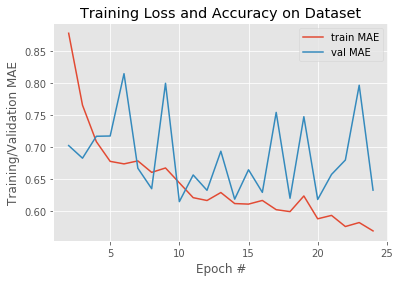

In [18]:
#historyDF.loc[2:,"mean_absolute_error"]
#from row 2 onwards of column "mean_absolute_error"
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(2, N), historyDF.loc[2:,"mean_absolute_error"], label="train MAE")
plt.plot(np.arange(2, N), historyDF.loc[2:,"val_mean_absolute_error"], label="val MAE")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Training/Validation MAE")
plt.legend(loc="upper right")

In [13]:
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,fill_mode="nearest")

In [14]:
csv_logger2 = CSVLogger(os.path.join('C:/', 'Users/alegAsus/Downloads/SCUT-FBP5500_v2.1/SCUT-FBP5500_v2/saved models/continous RMSE/callbacks2 AF.log'), separator=',', append=False)

In [15]:
modelHistoryAug = model.fit_generator(aug.flow(trainX, trainY, batch_size=32),
validation_data=(testX, testY),steps_per_epoch=len(trainX) // 32, callbacks=[csv_logger2], epochs = N)

Epoch 1/25
46/46 [==============================] - 3s 76ms/step - loss: 0.7029 - mean_absolute_error: 0.6702 - val_loss: 0.8407 - val_mean_absolute_error: 0.7410
Epoch 2/25
46/46 [==============================] - 3s 73ms/step - loss: 0.6771 - mean_absolute_error: 0.6707 - val_loss: 0.6248 - val_mean_absolute_error: 0.6269
Epoch 3/25
46/46 [==============================] - 3s 71ms/step - loss: 0.6642 - mean_absolute_error: 0.6607 - val_loss: 0.7363 - val_mean_absolute_error: 0.6849
Epoch 4/25
46/46 [==============================] - 3s 70ms/step - loss: 0.6546 - mean_absolute_error: 0.6599 - val_loss: 1.0423 - val_mean_absolute_error: 0.8397
Epoch 5/25
46/46 [==============================] - 3s 73ms/step - loss: 0.6688 - mean_absolute_error: 0.6576 - val_loss: 0.9751 - val_mean_absolute_error: 0.8123
Epoch 6/25
46/46 [==============================] - 3s 71ms/step - loss: 0.6218 - mean_absolute_error: 0.6411 - val_loss: 0.6271 - val_mean_absolute_error: 0.6246
Epoch 7/25
46/46 [====

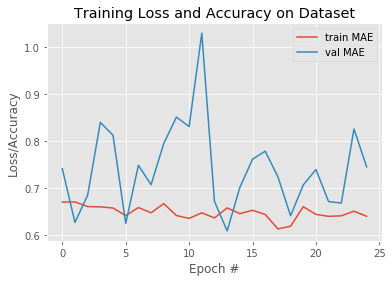

In [16]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), modelHistoryAug.history["mean_absolute_error"], label="train MAE")
plt.plot(np.arange(0, N), modelHistoryAug.history["val_mean_absolute_error"], label="val MAE")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")